In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

c:\Users\kiril\Documents\GitHub\ML_project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('../ready_data/merged_starwis_and_weather.csv')
df.rename({"ts": "ds",
           "Friction": "y"}, axis=1, inplace=True, copy=False)
df

,ds,airTemp,humidity,dewpoint,precipitation,y,Road_Surface_Temperature,Water_Film_Surface_mm
0,2021-11-01 00:05:00,8.8,94.0,7.9,0,0.82,5.082435,0.0
1,2021-11-01 00:15:00,9.1,91.0,7.7,0,0.82,5.035252,0.0
2,2021-11-01 00:25:00,9.1,90.0,7.5,0,0.82,4.951386,0.0
3,2021-11-01 00:35:00,9.2,88.0,7.3,0,0.82,5.077870,0.0
4,2021-11-01 00:45:00,9.2,86.0,7.0,0,0.82,4.919721,0.0
...,...,...,...,...,...,...,...,...
73546,2024-04-30 23:17:38,6.3,69.0,1.0,0,0.82,6.109013,0.0
73547,2024-04-30 23:27:38,6.1,70.0,1.0,0,0.82,5.974962,0.0
73548,2024-04-30 23:37:38,5.6,73.0,1.1,0,0.82,5.739287,0.0
73549,2024-04-30 23:47:38,5.2,75.0,1.0,0,0.82,5.527323,0.0


In [3]:
df['cap'] = 0.8
df['floor'] = 0

In [4]:
cutoff = int(len(df) * 0.8)

# train data
X_train = df[0:cutoff]

# test data 
X_test = df[cutoff:]

In [5]:
model = Prophet(growth='logistic', scaling="minmax")
model.add_regressor("airTemp", standardize=False)
model.add_regressor("humidity", standardize=False)
model.add_regressor("dewpoint", standardize=False)
model.add_regressor("precipitation", standardize=False)
model.add_regressor("Road_Surface_Temperature", standardize=False)
model.add_regressor("Water_Film_Surface_mm", standardize=False)
model.fit(X_train)

00:11:50 - cmdstanpy - INFO - Chain [1] start processing
00:13:14 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
#To view the model parameters 
model.params

OrderedDict([('lp__', array([[86157.2]])),
             ('k', array([[-4.15811]])),
             ('m', array([[2.02741]])),
             ('delta',
              array([[-0.0995151, -0.10273  , -0.101556 , -0.105396 , -0.107136 ,
                      -0.0771429, -0.0791619, -0.0853817, -0.0907366, -0.0978738,
                      -0.10655  , -0.11362  , -0.185535 , -0.191845 , -0.197923 ,
                      -0.199214 , -0.198888 , -0.196062 , -0.189987 , -0.183508 ,
                      -0.170922 , -0.156401 , -0.14038  , -0.125567 , -0.111172 ]])),
             ('sigma_obs', array([[0.140099]])),
             ('beta',
              array([[ 5.80508e-01,  7.45845e-01, -4.24266e-01, -2.14901e-01,
                      -1.62694e-01,  8.70752e-02,  2.29744e-01, -2.44190e-01,
                      -1.18883e-01,  9.49521e-02,  1.73941e-01,  1.11873e-01,
                      -1.18389e-01, -2.32977e-01,  1.44953e-01,  3.24747e-01,
                      -1.96295e-01, -2.22187e-01,  1.269

In [7]:
X_train2 = X_train.drop("y",axis=1)

In [8]:
forecast1_train = model.predict(X_train2)
forecast1_train


,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,Road_Surface_Temperature,Road_Surface_Temperature_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-11-01 00:05:00,0.799825,0.8,0,0.526992,0.818304,0.799825,0.799825,0.050220,0.050220,...,-0.018435,-0.018435,-0.018435,0.499730,0.499730,0.499730,0.0,0.0,0.0,0.675724
1,2021-11-01 00:15:00,0.799825,0.8,0,0.537898,0.814550,0.799825,0.799825,0.049754,0.049754,...,-0.018344,-0.018344,-0.018344,0.499977,0.499977,0.499977,0.0,0.0,0.0,0.681195
2,2021-11-01 00:25:00,0.799825,0.8,0,0.542213,0.828798,0.799825,0.799825,0.048925,0.048925,...,-0.018249,-0.018249,-0.018249,0.500224,0.500224,0.500224,0.0,0.0,0.0,0.682182
3,2021-11-01 00:35:00,0.799825,0.8,0,0.556295,0.837085,0.799825,0.799825,0.050175,0.050175,...,-0.018151,-0.018151,-0.018151,0.500470,0.500470,0.500470,0.0,0.0,0.0,0.688761
4,2021-11-01 00:45:00,0.799825,0.8,0,0.552196,0.837757,0.799825,0.799825,0.048612,0.048612,...,-0.018049,-0.018049,-0.018049,0.500717,0.500717,0.500717,0.0,0.0,0.0,0.692802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58835,2024-01-16 12:25:21,0.721767,0.8,0,0.257997,0.546614,0.721767,0.721767,-0.167683,-0.167683,...,0.000377,0.000377,0.000377,0.408253,0.408253,0.408253,0.0,0.0,0.0,0.406567
58836,2024-01-16 12:35:21,0.721763,0.8,0,0.259469,0.551940,0.721763,0.721763,-0.167380,-0.167380,...,0.000169,0.000169,0.000169,0.408206,0.408206,0.408206,0.0,0.0,0.0,0.410782
58837,2024-01-16 12:45:21,0.721758,0.8,0,0.284059,0.564082,0.721758,0.721758,-0.167093,-0.167093,...,-0.000041,-0.000041,-0.000041,0.408159,0.408159,0.408159,0.0,0.0,0.0,0.413891
58838,2024-01-16 12:55:21,0.721754,0.8,0,0.269883,0.558065,0.721754,0.721754,-0.169770,-0.169770,...,-0.000252,-0.000252,-0.000252,0.408113,0.408113,0.408113,0.0,0.0,0.0,0.408555


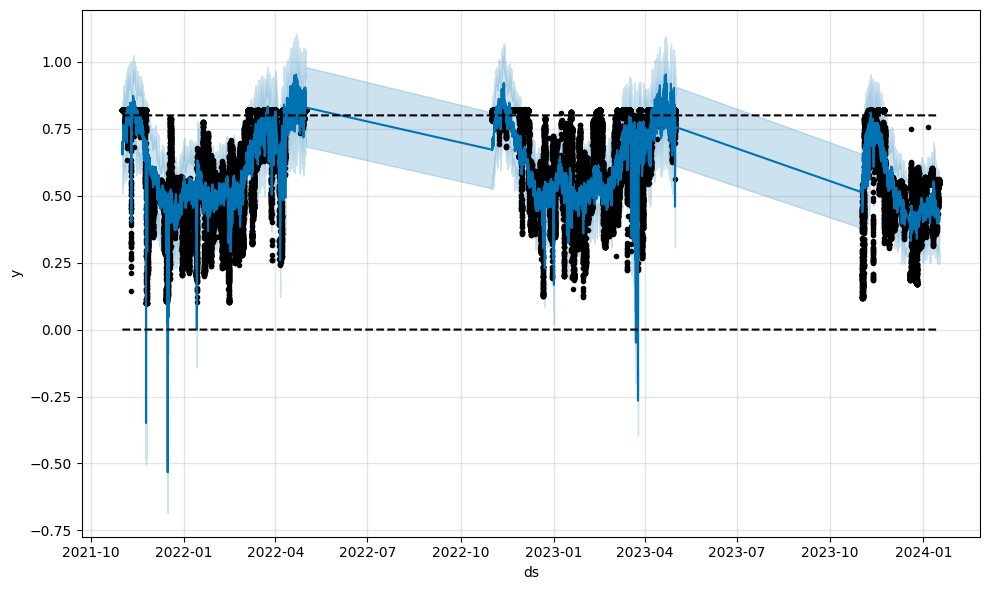

In [9]:
fig = model.plot(forecast1_train)

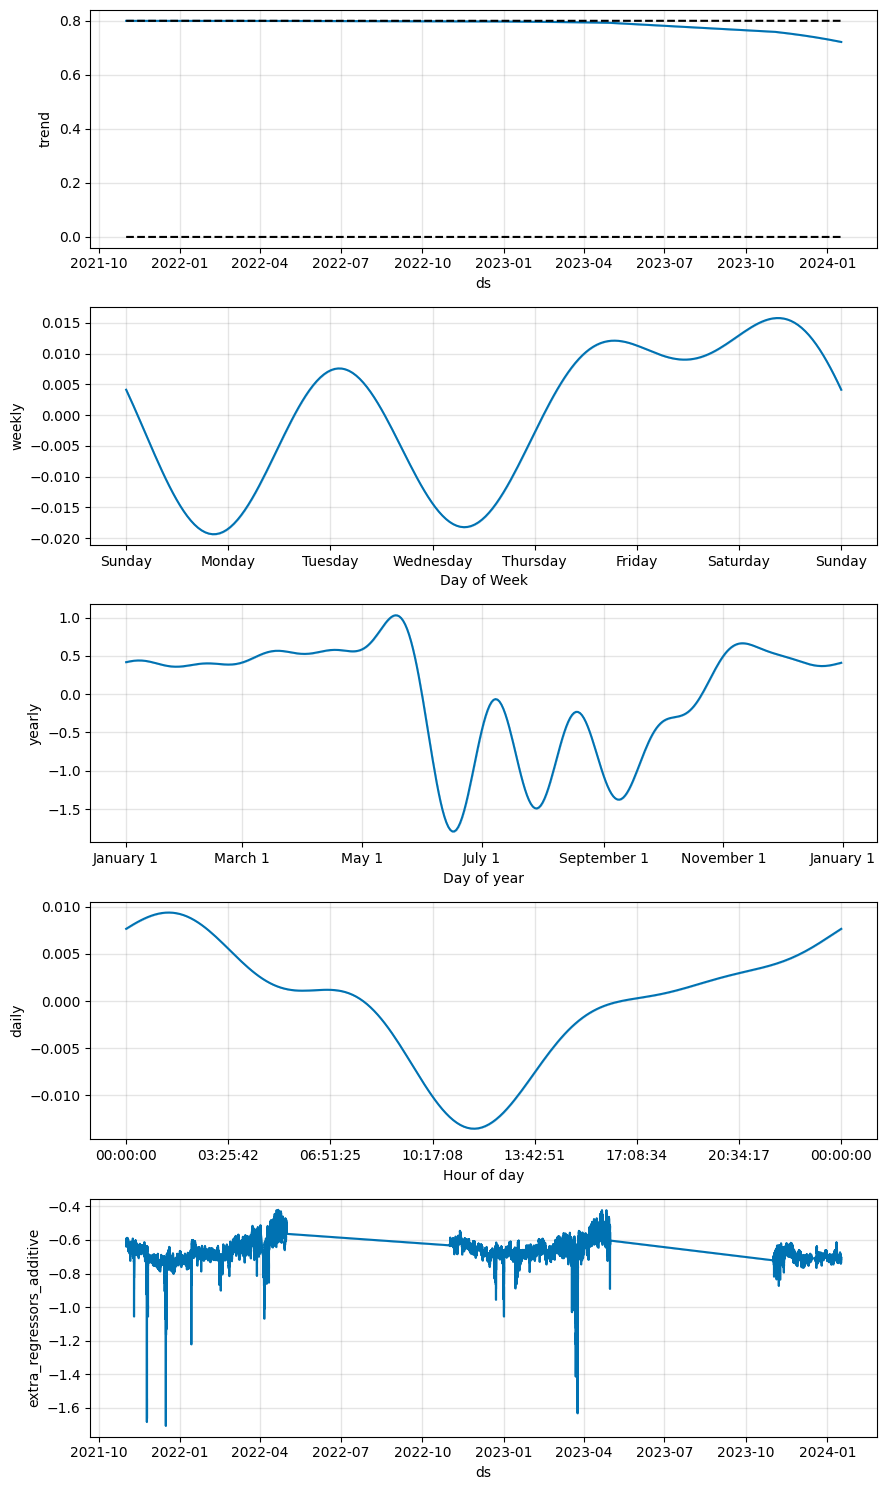

In [10]:
fig = model.plot_components(forecast1_train)


In [11]:
cutoffs = pd.to_datetime(['2021-11-07 13:15:00', '2022-11-07 13:14:00'])
df_cv2 = cross_validation(model, cutoffs=cutoffs, horizon='2 days')


Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/2 [00:00<?, ?it/s]00:13:21 - cmdstanpy - INFO - Chain [1] start processing
00:13:22 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 1/2 [00:01<00:01,  1.88s/it]00:13:25 - cmdstanpy - INFO - Chain [1] start processing
00:13:57 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 2/2 [18:21<00:00, 550.50s/it]


In [13]:
df_p = performance_metrics(df_cv2)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,0 days 04:40:00,0.000180,0.013399,0.007715,0.010017,0.001678,0.009864,1.0
1,0 days 04:41:46,0.000236,0.015376,0.008446,0.011128,0.001678,0.010917,1.0
2,0 days 04:50:00,0.000236,0.015377,0.008464,0.011150,0.001678,0.010939,1.0
3,0 days 04:51:46,0.000305,0.017455,0.009307,0.012386,0.001678,0.012110,1.0
4,0 days 05:01:46,0.000364,0.019088,0.010331,0.013810,0.002354,0.013479,1.0
